# Welcome to a PSP Data Exploration Demonstration using E7
## By: Jaye Verniero + SWEAP team

For optimal scientific interpretation of noteworthy event, the reader is strongly encouraged to contact a member of the instrument team: <br>
Roberto Livi rlivi@berkeley.edu <br>
Ali Rahmati rahmati@berkeley.edu <br>
Davin Larson davin@berkeley.edu <br>

Note this tutorial builds off the span-i quick start found here: https://github.com/jlverniero/PSP_Data_Analysis_Tutorials/blob/main/PSP_SPAN-I_data_tutorial_pyspedas.ipynb

## 0.) Import Packages

In [2]:
from scipy.io import readsav
import scipy.signal as signal
import cdflib
import pyspedas
import pyspedas
from pyspedas import time_string, time_double, tinterpol
import pytplot
from pytplot import tplot, store_data, get_data ,tlimit,xlim,ylim,tplot_options,options,split_vec,cdf_to_tplot,divide,tplot_names,get_timespan, tplot_rename, time_datetime #from pyspedas import time_string, time_double
from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)
import cdflib
from datetime import datetime,timedelta
import os.path
import bisect
import csv
from scipy import interpolate

#import math functions 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import dateutil.parser

from matplotlib import ticker, cm
import warnings 
warnings.filterwarnings("ignore")

from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

## 1.) Protons and Alphas

 ### 1.0) Download Data and make summary plot

Note that pyspedas currently loads in both the alphas (data product sf0a) and protons (sf00) with the same tplot variable name, so we need to rename the alphas and proton tplot variables with different names, otherwise one will overwrite the other. Pyspedas and pytplot is still in development, so this may change in the future.

In [20]:
#specify time range in the form ['yyyy-mm-dd/hh:mm:ss','yyyy-mm-dd/hh:mm:ss']
trange=['2023-09-25/00:00:00','2023-09-29/00:00:00']

#note that full resolution would be 'mag_rtn', but only download for short time periods, as it makes plotting very slow
mag_datatype = 'mag_rtn_4_sa_per_cyc' #mag
mag_vars = pyspedas.psp.fields(trange=trange, datatype=mag_datatype, level='l2', time_clip=True,get_support_data=True)

#Protons
#specify span-i data type to plot
spi_sf00_datatype='spi_sf00_l3_mom' #protons
spi_sf00_vars = pyspedas.psp.spi(trange=trange, datatype=spi_sf00_datatype, level='l3', time_clip=True)

09-May-24 14:22:06: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/
09-May-24 14:22:07: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230925_v02.cdf to psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230925_v02.cdf
09-May-24 14:22:08: Download complete: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230925_v02.cdf
09-May-24 14:22:08: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230926_v02.cdf to psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230926_v02.cdf
09-May-24 14:22:10: Download complete: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230926_v02.cdf
09-May-24 14:22:10: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_c

In [22]:
#Check tplot variable names
print(spi_sf00_vars)

['psp_spi_QUALITY_FLAG', 'psp_spi_DENS', 'psp_spi_VEL_INST', 'psp_spi_VEL_SC', 'psp_spi_VEL_RTN_SUN', 'psp_spi_T_TENSOR_INST', 'psp_spi_TEMP', 'psp_spi_EFLUX_VS_ENERGY', 'psp_spi_EFLUX_VS_THETA', 'psp_spi_EFLUX_VS_PHI', 'psp_spi_SUN_DIST', 'psp_spi_VENUS_DIST', 'psp_spi_SC_VEL_RTN_SUN', 'psp_spi_QUAT_SC_TO_RTN', 'psp_spi_MAGF_SC', 'psp_spi_MAGF_INST']


In [23]:
#rename tplot variables to distinguish proton variable name from alpha variable name
tplot_rename("psp_spi_QUALITY_FLAG","proton_QUALITY_FLAG")
tplot_rename("psp_spi_DENS","proton_DENS")
tplot_rename("psp_spi_VEL_INST","proton_VEL_INST")
tplot_rename("psp_spi_VEL_SC","proton_VEL_SC")
tplot_rename("psp_spi_VEL_RTN_SUN","proton_VEL_RTN_SUN")
tplot_rename("psp_spi_T_TENSOR_INST","proton_T_TENSOR_INST")
tplot_rename("psp_spi_TEMP","proton_TEMP")
tplot_rename("psp_spi_EFLUX_VS_ENERGY","proton_EFLUX_VS_ENERGY")
tplot_rename("psp_spi_EFLUX_VS_THETA","proton_EFLUX_VS_THETA")
tplot_rename("psp_spi_EFLUX_VS_PHI","proton_EFLUX_VS_PHI")
tplot_rename("psp_spi_SUN_DIST","proton_SUN_DIST")
tplot_rename("psp_spi_VENUS_DIST","proton_VENUS_DIST")
tplot_rename("psp_spi_SC_VEL_RTN_SUN","proton_SC_VEL_RTN_SUN")
tplot_rename("psp_spi_QUAT_SC_TO_RTN","proton_QUAT_SC_TO_RTN")
tplot_rename("psp_spi_MAGF_SC","proton_MAGF_SC")
tplot_rename("psp_spi_MAGF_INST","proton_MAGF_INST")

1.1.) Make summary plot

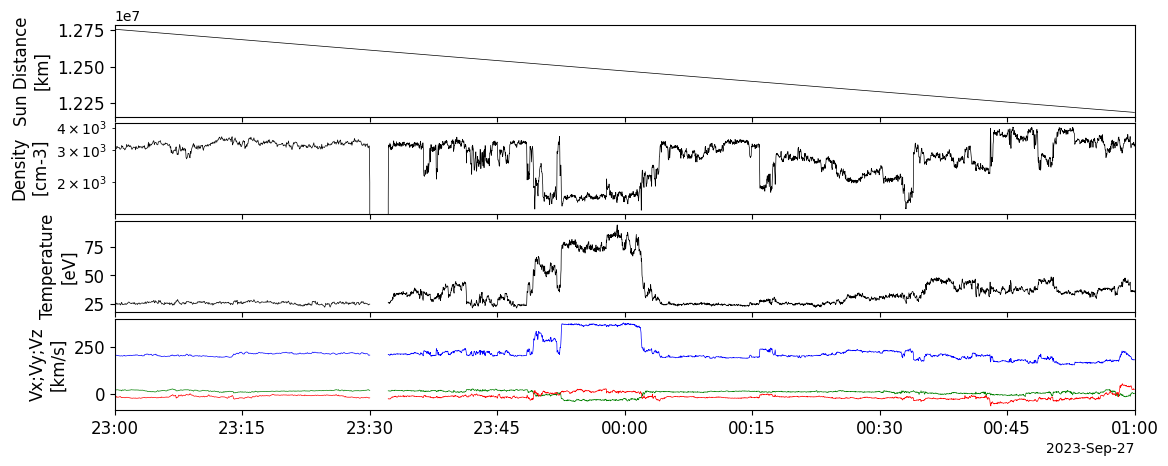

In [25]:
#Make proton summary plot of distance from sun, density, temperature, and velocity in RTN coordinates
xlim('2023-09-26/23:00:00','2023-09-27/01:00:00')
tplot(['proton_SUN_DIST','proton_DENS','proton_TEMP','proton_VEL_RTN_SUN'])

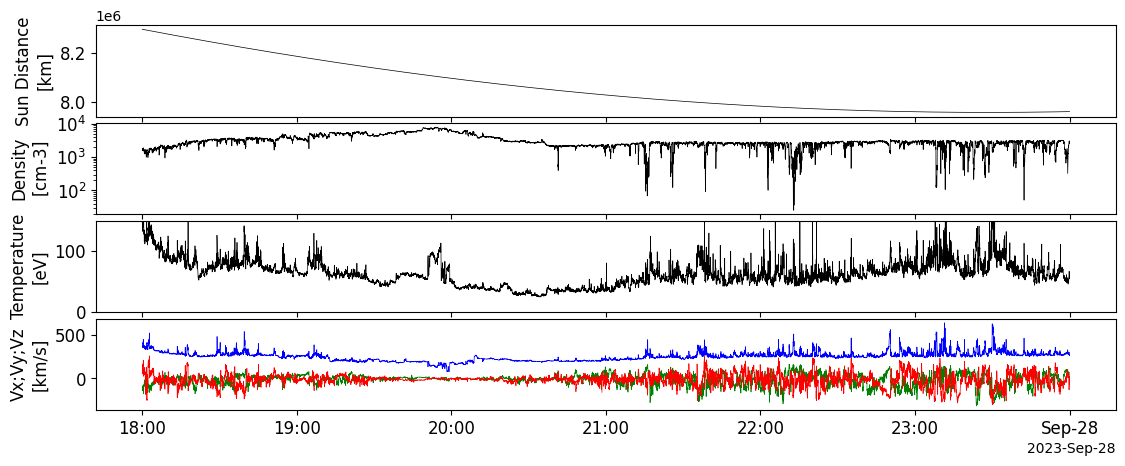

In [7]:
#A large spike in temperature appeared in the third panel. Let's change the yrange of this variable and replot
pytplot.options('proton_TEMP','yrange',[0,150])
#note the tplot command should always be last, after changing variable attributes
tplot(['proton_SUN_DIST','proton_DENS','proton_TEMP','proton_VEL_RTN_SUN']) 

In [7]:
#Alphas
spi_sf0a_datatype='spi_sf0a_l3_mom' #alphas
#Remember to do notplot=true and downloadonly=true
spi_sf0a_vars = pyspedas.psp.spi(trange=trange, datatype=spi_sf0a_datatype, level='l3', time_clip=True)

02-May-24 15:06:55: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2021/
02-May-24 15:06:57: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2021/psp_swp_spi_sf0a_l3_mom_20210114_v04.cdf to psp_data/sweap/spi/l3/spi_sf0a_l3_mom/2021/psp_swp_spi_sf0a_l3_mom_20210114_v04.cdf
02-May-24 15:07:01: Download complete: psp_data/sweap/spi/l3/spi_sf0a_l3_mom/2021/psp_swp_spi_sf0a_l3_mom_20210114_v04.cdf
02-May-24 15:07:01: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2021/psp_swp_spi_sf0a_l3_mom_20210115_v04.cdf to psp_data/sweap/spi/l3/spi_sf0a_l3_mom/2021/psp_swp_spi_sf0a_l3_mom_20210115_v04.cdf
02-May-24 15:07:03: Download complete: psp_data/sweap/spi/l3/spi_sf0a_l3_mom/2021/psp_swp_spi_sf0a_l3_mom_20210115_v04.cdf
02-May-24 15:07:04: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2021/psp_swp_spi_sf0a_l3_mom_20210116_v04.cdf to psp_data/sweap/

In [8]:
#Check tplot variable names
print(spi_sf0a_vars)

['psp_spi_QUALITY_FLAG', 'psp_spi_DENS', 'psp_spi_VEL_INST', 'psp_spi_VEL_SC', 'psp_spi_VEL_RTN_SUN', 'psp_spi_T_TENSOR_INST', 'psp_spi_TEMP', 'psp_spi_EFLUX_VS_ENERGY', 'psp_spi_EFLUX_VS_THETA', 'psp_spi_EFLUX_VS_PHI', 'psp_spi_SUN_DIST', 'psp_spi_VENUS_DIST', 'psp_spi_SC_VEL_RTN_SUN', 'psp_spi_QUAT_SC_TO_RTN', 'psp_spi_MAGF_SC', 'psp_spi_MAGF_INST']


Note they were named the same as the proton (sf00) variables. Even though they are now technically distinguished, let's also rename these as alpha variables.

In [8]:
#rename tplot variables to distinguish alpha variable name from alpha variable name
tplot_rename("psp_spi_QUALITY_FLAG","alpha_QUALITY_FLAG")
tplot_rename("psp_spi_DENS","alpha_DENS")
tplot_rename("psp_spi_VEL_INST","alpha_VEL_INST")
tplot_rename("psp_spi_VEL_SC","alpha_VEL_SC")
tplot_rename("psp_spi_VEL_RTN_SUN","alpha_VEL_RTN_SUN")
tplot_rename("psp_spi_T_TENSOR_INST","alpha_T_TENSOR_INST")
tplot_rename("psp_spi_TEMP","alpha_TEMP")
tplot_rename("psp_spi_EFLUX_VS_ENERGY","alpha_EFLUX_VS_ENERGY")
tplot_rename("psp_spi_EFLUX_VS_THETA","alpha_EFLUX_VS_THETA")
tplot_rename("psp_spi_EFLUX_VS_PHI","alpha_EFLUX_VS_PHI")
tplot_rename("psp_spi_SUN_DIST","alpha_SUN_DIST")
tplot_rename("psp_spi_VENUS_DIST","alpha_VENUS_DIST")
tplot_rename("psp_spi_SC_VEL_RTN_SUN","alpha_SC_VEL_RTN_SUN")
tplot_rename("psp_spi_QUAT_SC_TO_RTN","alpha_QUAT_SC_TO_RTN")
tplot_rename("psp_spi_MAGF_SC","alpha_MAGF_SC")
tplot_rename("psp_spi_MAGF_INST","alpha_MAGF_INST")

09-May-24 13:59:36: The name psp_spi_QUALITY_FLAG is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_DENS is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_VEL_INST is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_VEL_SC is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_VEL_RTN_SUN is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_T_TENSOR_INST is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_TEMP is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_EFLUX_VS_ENERGY is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_EFLUX_VS_THETA is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_EFLUX_VS_PHI is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_SUN_DIST is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_VENUS_DIST is currently not in pytplot
09-May-24 13:59:36: The name psp_spi_SC_VEL_RTN_SUN is currently not in pytplot
09-May-24 1

In [15]:
!pip install --upgrade pip
!pip install pytplot --upgrade

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


02-May-24 15:05:38: The name alpha_SUN_DIST is currently not in pytplot
02-May-24 15:05:38: The name alpha_SUN_DIST is currently not in pytplot
02-May-24 15:05:38: Variable not found: alpha_SUN_DIST
02-May-24 15:05:38: The name alpha_DENS is currently not in pytplot
02-May-24 15:05:38: The name alpha_DENS is currently not in pytplot
02-May-24 15:05:38: Variable not found: alpha_DENS
02-May-24 15:05:38: The name alpha_TEMP is currently not in pytplot
02-May-24 15:05:38: The name alpha_TEMP is currently not in pytplot
02-May-24 15:05:38: Variable not found: alpha_TEMP
02-May-24 15:05:38: The name alpha_VEL_RTN_SUN is currently not in pytplot
02-May-24 15:05:38: The name alpha_VEL_RTN_SUN is currently not in pytplot
02-May-24 15:05:38: Variable not found: alpha_VEL_RTN_SUN


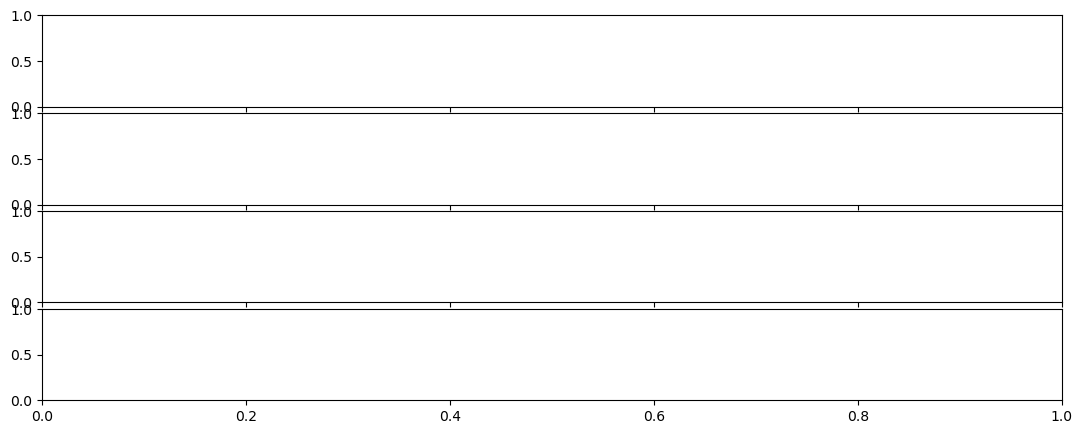

In [16]:
#Make proton summary plot of distance from sun, density, temperature, and velocity in RTN coordinates
tplot(['alpha_SUN_DIST','alpha_DENS','alpha_TEMP','alpha_VEL_RTN_SUN'])

09-May-24 13:59:45: alpha_TEMP is currently not in pytplot.
09-May-24 13:59:45: The name alpha_SUN_DIST is currently not in pytplot
09-May-24 13:59:45: The name alpha_SUN_DIST is currently not in pytplot
09-May-24 13:59:45: Variable not found: alpha_SUN_DIST
09-May-24 13:59:45: The name alpha_DENS is currently not in pytplot
09-May-24 13:59:45: The name alpha_DENS is currently not in pytplot
09-May-24 13:59:45: Variable not found: alpha_DENS
09-May-24 13:59:45: The name alpha_TEMP is currently not in pytplot
09-May-24 13:59:45: The name alpha_TEMP is currently not in pytplot
09-May-24 13:59:45: Variable not found: alpha_TEMP
09-May-24 13:59:45: The name alpha_VEL_RTN_SUN is currently not in pytplot
09-May-24 13:59:45: The name alpha_VEL_RTN_SUN is currently not in pytplot
09-May-24 13:59:45: Variable not found: alpha_VEL_RTN_SUN


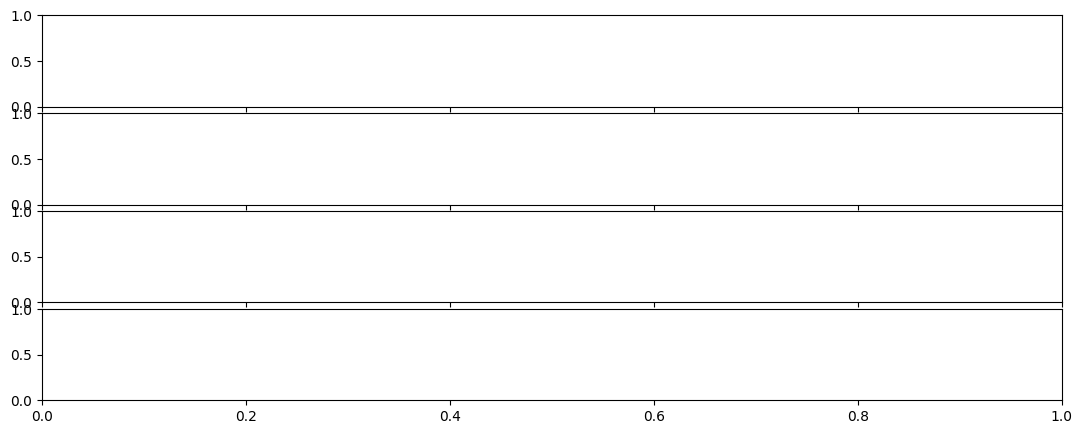

In [9]:
#Let's also change the yrange of the temperature variable and replot
pytplot.options('alpha_TEMP','yrange',[0,1500])
#note the tplot command should always be last, after changing variable attributes
tplot(['alpha_SUN_DIST','alpha_DENS','alpha_TEMP','alpha_VEL_RTN_SUN']) 

## 2) Add magnetic field from fluxgate magnetometer

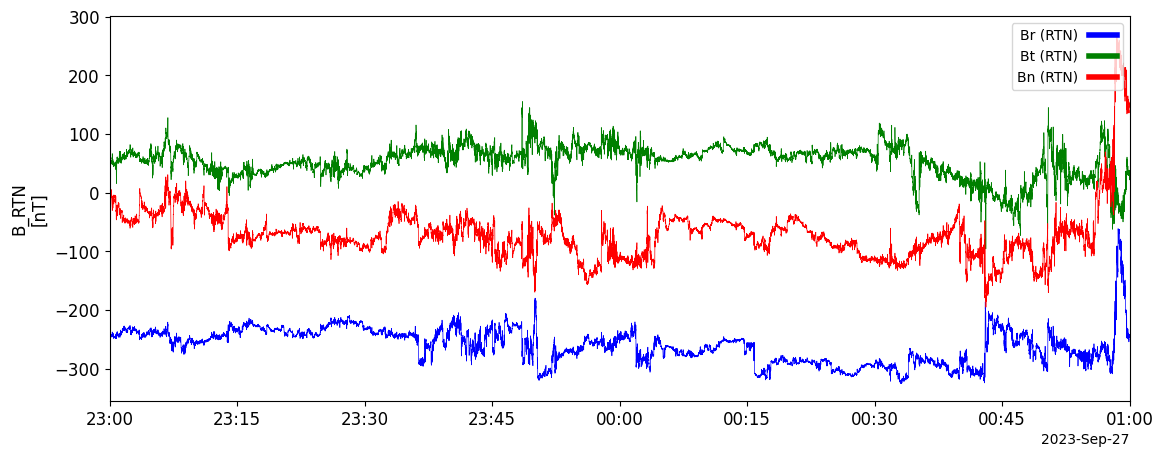

In [26]:
#plot B field in (RTN) coordinates
tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

In [11]:
pip install --upgrade matplotlib

IOStream.flush timed out
IOStream.flush timed out
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 44.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib
print(matplotlib.__version__)

3.5.2


09-May-24 14:20:50: No data found in the time range: proton_SUN_DIST
09-May-24 14:20:50: No data found in the time range: psp_fld_l2_mag_RTN_4_Sa_per_Cyc
09-May-24 14:20:50: No data found in the time range: proton_DENS
09-May-24 14:20:50: No data found in the time range: proton_TEMP
09-May-24 14:20:50: No data found in the time range: proton_VEL_RTN_SUN


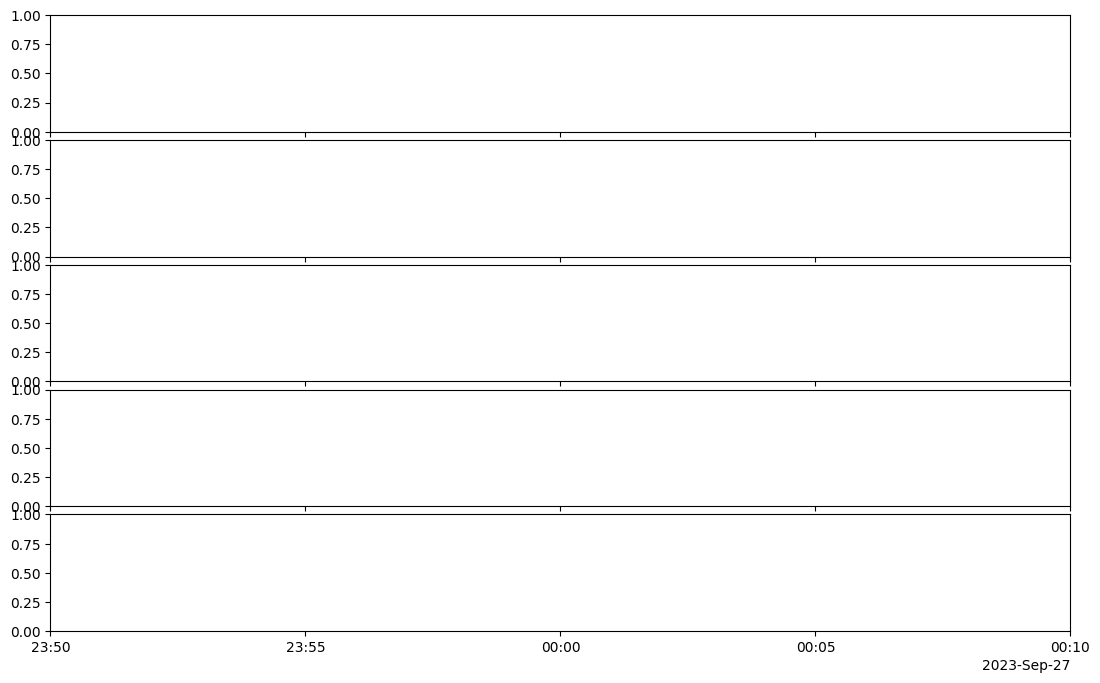

In [15]:
xlim('2023-09-27/19:50:00','2023-09-27/20:00:00')
tplot(['proton_SUN_DIST','psp_fld_l2_mag_RTN_4_Sa_per_Cyc','proton_DENS','proton_TEMP','proton_VEL_RTN_SUN'])

## 3.) Calculate and define common plasma parameters

For both magnetic field and velocity, the T and N components are usually much lower in magnitude than the R component. I like to do the following step to separate them and see things better.

In [27]:
#Split magnetic field vector into 3 separate tplot variables (xyz = rtn)
split_vec('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

#access data in magnetic field components
br = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc_x')
#note that times are stored in arrays as br.times and br.y for the values
bt = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc_y')
bn = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc_z')
#define |B| and store as tplot variable
bmag = np.sqrt(br.y**2 + bt.y **2 + bn.y**2)
store_data('|B|',data = {'x': br.times, 'y': bmag})
#Separate T and N components on one panel
store_data('Btn', data = ['psp_fld_l2_mag_RTN_4_Sa_per_Cyc_y','psp_fld_l2_mag_RTN_4_Sa_per_Cyc_z'])
options('Btn', 'color', ['orange', 'dodgerblue'])
options('Btn', 'legend_names', ['Bt', 'Bn'])
options('Btn','ytitle','Btn')
tplot_rename("psp_fld_l2_mag_RTN_4_Sa_per_Cyc_x","Br")
options('Br','ytitle','Br')
options('Br','color','forestgreen')

In [28]:
#Split velocity vector into 3 separate tplot variables (xyz = rtn)
split_vec('proton_VEL_RTN_SUN')

#access data in velocity components
vr = get_data('proton_VEL_RTN_SUN_x')
vt = get_data('proton_VEL_RTN_SUN_y')
vn = get_data('proton_VEL_RTN_SUN_z')
#define |Vsw| and store as tplot variable
vmag = np.sqrt(vr.y**2 + vt.y **2 + vn.y**2)
store_data('|Vsw|',data = {'x': vr.times, 'y': vmag})
#Separate T and N components on one panel
store_data('Vtn', data = ['proton_VEL_RTN_SUN_y','proton_VEL_RTN_SUN_z'])
options('Vtn', 'color', ['orange', 'dodgerblue'])
options('Vtn', 'legend_names', ['Vt', 'Vn'])
options('Vtn','ytitle','Vtn')
tplot_rename("proton_VEL_RTN_SUN_x","Vr")
options('Vr','ytitle','Vr')
options('Vr','color','forestgreen')

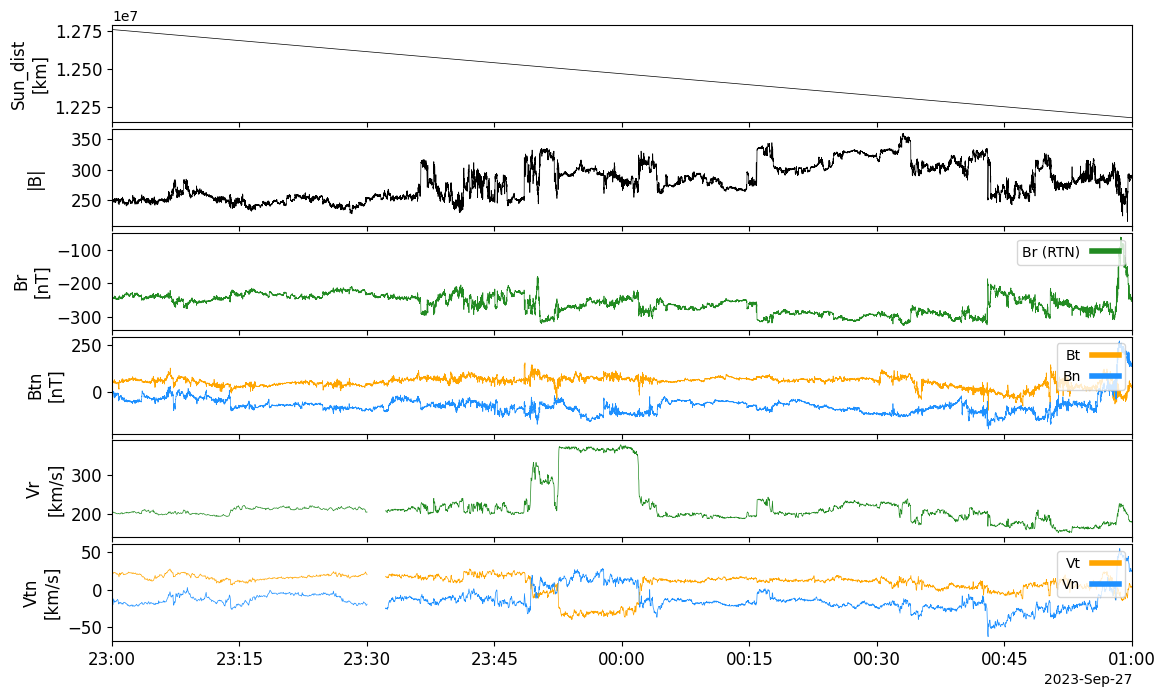

In [29]:
xlim('2023-09-26/23:00:00','2023-09-27/01:00:00')
options('proton_SUN_DIST','ytitle','Sun_dist')
tplot(['proton_SUN_DIST','|B|','Br','Btn','Vr','Vtn'])

09-May-24 14:34:05: ytitle is currently not in pytplot.


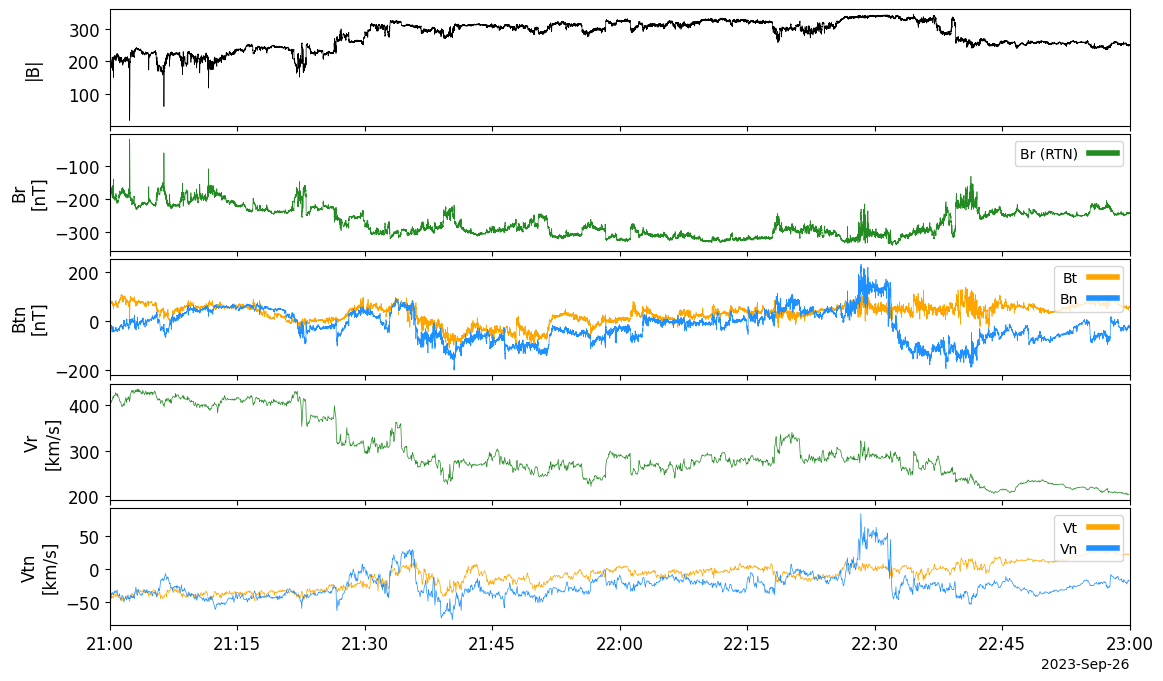

In [41]:
xlim('2023-09-26/21:00:00','2023-09-26/23:00:00')
options('ytitle','Sun_dist')
tplot_options('wsize', [500,1500])
tplot(['|B|','Br','Btn','Vr','Vtn'])


### 3.1.) Download QTN for "most reliable density measurement"

In [42]:
# ⭐️ pyspedas command for downloading QTN
# We'll need to get the variable names because this is the tplot names
# it might just be n_elec (this is the density of the electrons, measured by electric field inst)
#
#Download QTN for "most reliable density measurement"

qtn_datatype = 'sqtn_rfs_V1V2' #sqtn
qtn_vars = pyspedas.psp.fields(trange=trange, datatype=qtn_datatype, level='l3', time_clip=True,get_support_data=True)

09-May-24 14:35:00: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l3/sqtn_rfs_v1v2/2023/


Using LEVEL=L3


09-May-24 14:35:00: No links matching pattern psp_fld_l3_sqtn_rfs_v1v2_20230925_v?.?.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l3/sqtn_rfs_v1v2/2023/
09-May-24 14:35:00: No links matching pattern psp_fld_l3_sqtn_rfs_v1v2_20230926_v?.?.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l3/sqtn_rfs_v1v2/2023/
09-May-24 14:35:00: No links matching pattern psp_fld_l3_sqtn_rfs_v1v2_20230927_v?.?.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l3/sqtn_rfs_v1v2/2023/
09-May-24 14:35:00: No links matching pattern psp_fld_l3_sqtn_rfs_v1v2_20230928_v?.?.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l3/sqtn_rfs_v1v2/2023/


09-May-24 14:35:05: The name electron_density is currently not in pytplot
09-May-24 14:35:05: The name electron_density is currently not in pytplot
09-May-24 14:35:05: Variable not found: electron_density


[]


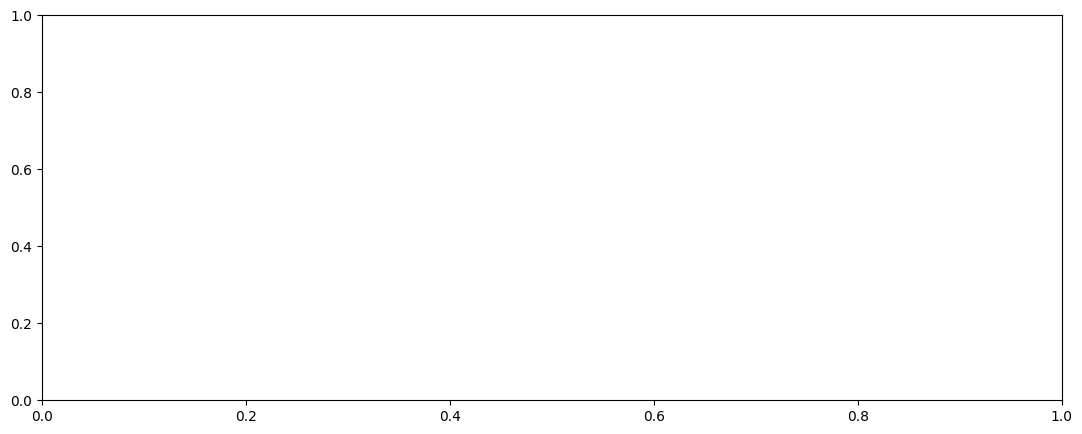

In [43]:
#See variable names and plot vs time
xlim(trange[0],trange[1])
print(qtn_vars)
tplot('electron_density')

### 3.2.) Calculate proton temperature anisotropy $T_\perp$ and $T_\parallel$

In [50]:
#Proton temperature anisotropy from Temperature Tensor

#Access tensor elements
T_Tens = get_data('proton_T_TENSOR_INST')
T_XX = T_Tens.y[:,0]
T_YY = T_Tens.y[:,1]
T_ZZ = T_Tens.y[:,2]
T_XY = T_Tens.y[:,3]
T_XZ = T_Tens.y[:,4]
T_YZ = T_Tens.y[:,5]

T_YX = T_XY
T_ZX = T_XZ
T_ZY = T_YZ

#Access magnetic field in span-I coordinates
B_spi = get_data('proton_MAGF_INST')
B_X = B_spi.y[:,0]
B_Y = B_spi.y[:,1]
B_Z = B_spi.y[:,2]
B_mag_XYZ = np.sqrt(B_X**2 + B_Y**2 + B_Z**2)

#Project Tensor onto B field, find perpendicular and parallel components
T_parallel=[]
T_perpendicular=[]
Anisotropy=[]
for i in range(len(B_X)):
    Sum_1=B_X[i]*B_X[i]*T_XX[i]
    Sum_2=B_X[i]*B_Y[i]*T_XY[i]
    Sum_3=B_X[i]*B_Z[i]*T_XZ[i]
    Sum_4=B_Y[i]*B_X[i]*T_YX[i]
    Sum_5=B_Y[i]*B_Y[i]*T_YY[i]
    Sum_6=B_Y[i]*B_Z[i]*T_YZ[i]
    Sum_7=B_Z[i]*B_X[i]*T_ZX[i]
    Sum_8=B_Z[i]*B_Y[i]*T_ZY[i]
    Sum_9=B_Z[i]*B_Z[i]*T_ZZ[i]    
    T_para=((Sum_1+Sum_2+Sum_3+Sum_4+Sum_5+Sum_6+Sum_7+Sum_8+Sum_9)/(B_mag_XYZ[i])**2)
    Trace_Temp=(T_XX[i]+T_YY[i]+T_ZZ[i])
    T_perp=(Trace_Temp-T_para)/2.0
    T_parallel.append((Sum_1+Sum_2+Sum_3+Sum_4+Sum_5+Sum_6+Sum_7+Sum_8+Sum_9)/(B_mag_XYZ[i])**2)
    T_perpendicular.append(T_perp)
    Anisotropy.append(T_perp/T_para)

#store tplot variables
store_data('Proton TA',data={'x':B_spi.times,'y': Anisotropy}) #ratio Tperp/Tpar <-- HELPFUL!
store_data('Proton Tperp',data={'x':B_spi.times,'y': T_perpendicular})
store_data('Proton Tpar',data={'x':B_spi.times,'y': T_parallel})
store_data('Proton TperpTpar',data=['Proton Tperp', 'Proton Tpar'])
options('Proton TperpTpar', 'color', ['hotpink', 'deepskyblue'])
options('Proton TperpTpar', 'legend_names', ['Tperp', 'Tpar'])
options('Proton TperpTpar','yrange',[0,200])
options('Proton TperpTpar','ytitle','Proton Tperp,Tpar')

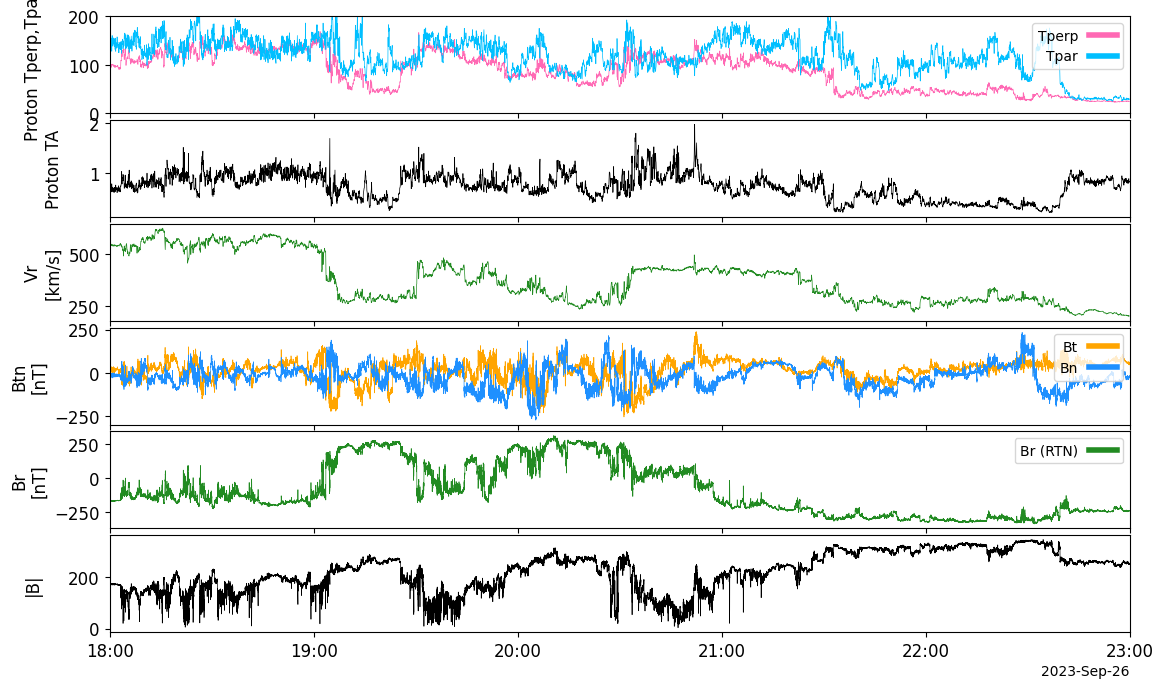

In [57]:
xlim('2023-09-26/18:00:00','2023-09-26/23:00:00')
tplot(['Proton TperpTpar','Proton TA','Vr','Btn','Br','|B|'])

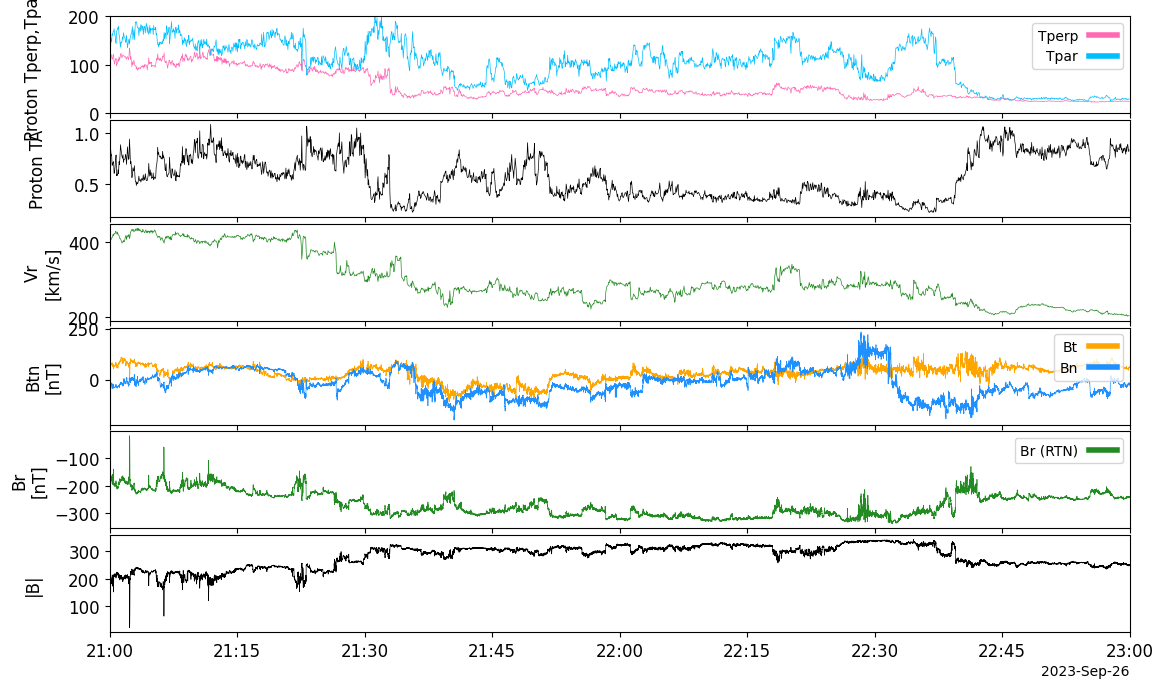

In [58]:
xlim('2023-09-26/21:00:00','2023-09-26/23:00:00')
tplot(['Proton TperpTpar','Proton TA','Vr','Btn','Br','|B|'])

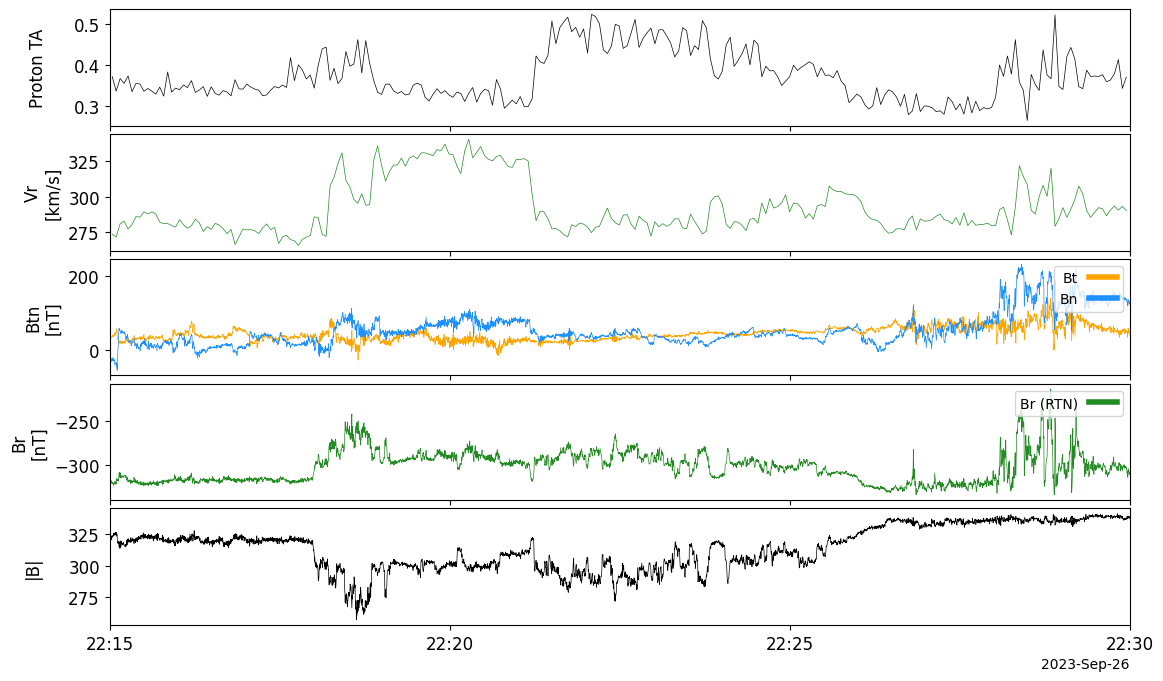

In [63]:
xlim('2023-09-26/22:15:00','2023-09-26/22:30:00')
tplot(['Proton TA','Vr','Btn','Br','|B|'])

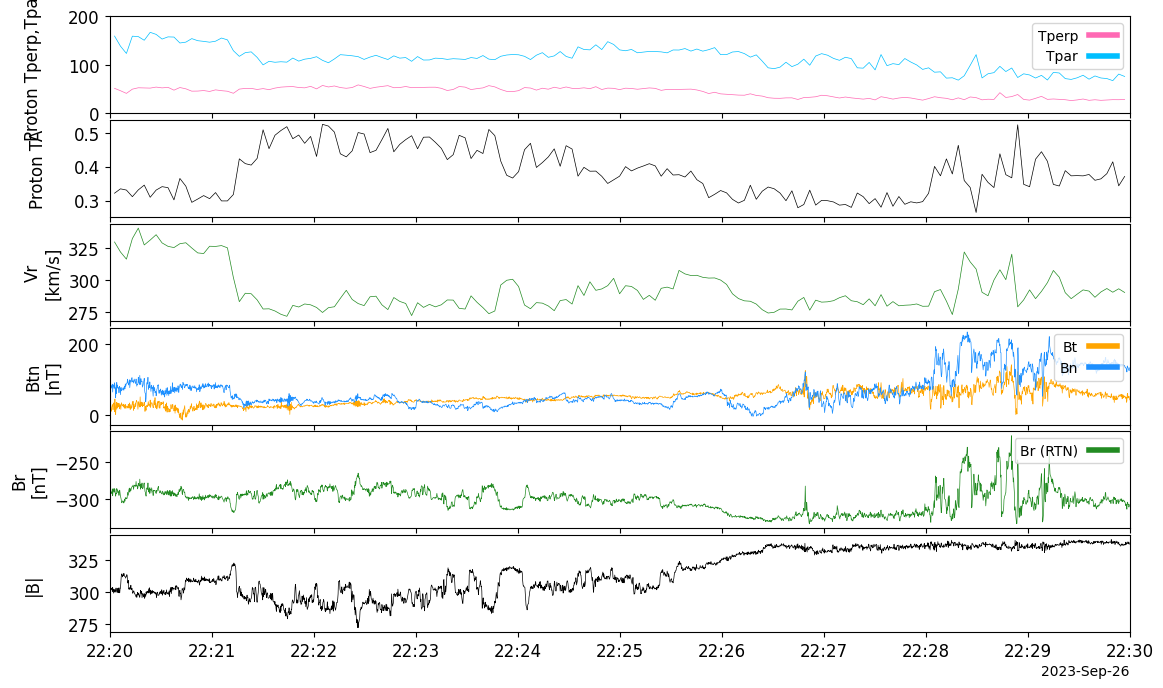

In [60]:
xlim('2023-09-26/22:20:00','2023-09-26/22:30:00')
tplot(['Proton TperpTpar','Proton TA','Vr','Btn','Br','|B|'])

One may notice excess parallel temperature in the middle of Jan 17. What is going on there?

## 2.3 Alfven Mach number and Proton Beta

In [64]:
#Compute Alfven Mach number and Proton Parallel Beta using QTN density

#interpolate B onto qtn grid
tinterpol('|B|','electron_density',newname='Bmag_ds')
bmag_ds = get_data('Bmag_ds')
qtn = get_data('electron_density')
#calculate Alfven speed
valfven_qtn = 21.8 * bmag_ds.y/ np.sqrt(qtn.y)
#store as tplot variable
store_data('valfven_qtn',data={'x':qtn.times, 'y':valfven_qtn})
#divide |Vsw| by alfven speed, store as tplot variable
#note: 'divide' function automatically interpolates if needed
divide('|Vsw|','valfven_qtn','A_Mach')
options('A_Mach','ytitle','A Mach')

#interpolate proton parallel temperature onto qtn grid
tinterpol('Proton Tpar','electron_density',newname = 'tpar_ds')
tpar_ds = get_data('tpar_ds')
#calculate proton parallel beta and store as tplot variable
#note 1e-5 is factor conversion from nT to cgs
beta_ppar = (4.03E-11*qtn.y*tpar_ds.y)/(1e-5*bmag_ds.y)**2
store_data('Beta_ppar',data={'x': qtn.times, 'y': beta_ppar})
options('Beta_ppar','yrange',[0,5])

10-May-24 09:12:12: The name electron_density is currently not in pytplot
10-May-24 09:12:12: Error, tplot variable: electron_density not found.
10-May-24 09:12:12: The name Bmag_ds is currently not in pytplot
10-May-24 09:12:12: The name electron_density is currently not in pytplot


AttributeError: 'NoneType' object has no attribute 'y'

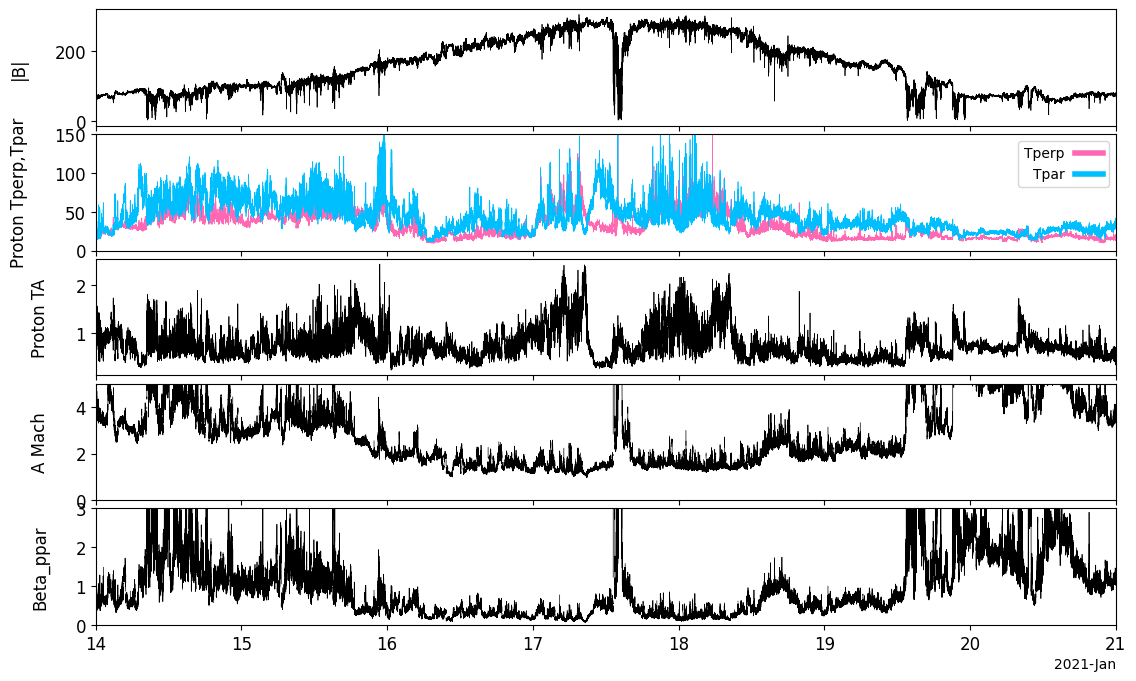

In [21]:
options('A_Mach','yrange',[0,5])
options('Beta_ppar','yrange',[0,3])
tplot(['|B|','Proton TperpTpar','Proton TA','A_Mach','Beta_ppar'])

One may notice that the excess parallel proton temperature on the 17th is adjacent to a large |B| depletion and coincident with the lowest Alfven mach number. Who else can we include to investigate ?

### 2.4 Alpha parameters

In [28]:
#best to use qtn density for protons if available
divide('alpha_DENS','electron_density','Na/Ne')
divide('alpha_DENS','proton_DENS','Na/Np')
options('Na/Ne','ytitle','Na/Ne')
options('Na/Np','ytitle','Na/Np')


#calculate alpha-proton drift speed as |Valphas|-|Vsw|. 

#define |Valpha| and store as tplot variable
split_vec('alpha_VEL_RTN_SUN')
Valpha_r = get_data('alpha_VEL_RTN_SUN_x')
Valpha_t = get_data('alpha_VEL_RTN_SUN_y')
Valpha_n = get_data('alpha_VEL_RTN_SUN_z')
Valpha = np.sqrt(Valpha_r.y**2 + Valpha_t.y**2 + Valpha_n.y**2)
store_data('|Valpha|',data={'x':Valpha_r.times, 'y': Valpha})

#Note alphas are slower cadence than the protons, so need to interpolate first.
tinterpol('|Vsw|','|Valpha|',newname = 'va-vp')
options('va-vp','ytitle','va-vp')
#normalize by alfven speed
divide('va-vp','valfven_qtn','va-vp/vA')
options('va-vp/vA','ytitle','va-vp/vA')

#calculate Alpha/proton temperature ratio
divide('alpha_TEMP','proton_TEMP','Ta/Tp')
options('Ta/Tp','ytitle','Ta/Tp')

05-Apr-24 22:15:54: tinterpol (linear) was applied to: va-vp


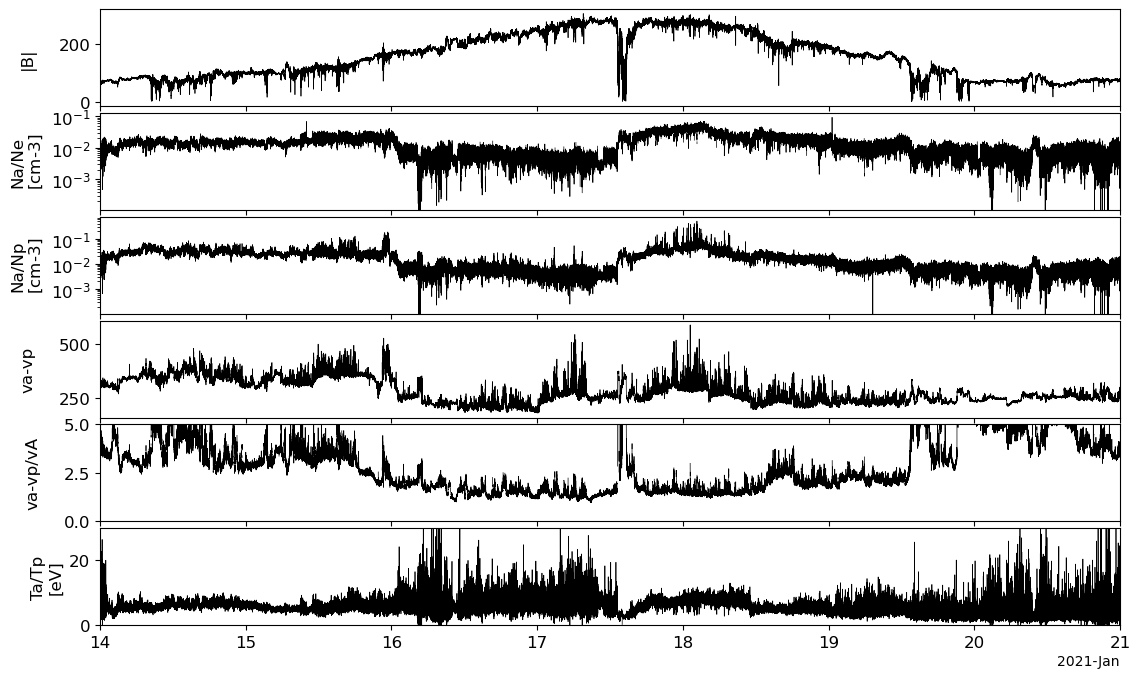

In [29]:
options('va-vp/vA','yrange',[0,5])
options('Ta/Tp','yrange',[0,30])
tplot(['|B|','Na/Ne','Na/Np','va-vp','va-vp/vA','Ta/Tp'])

One may notice that Na/Ne is slightly lower than Na/Np. Why is that ?

The region around the 17th also has high proton-alpha drift speed. Anyone else we can call on ?

## 3.) Add electron strahl pitch-angle distributions (PAD)

aka the ultimate tracer of magnetic field line topology

In [65]:
#specify time range in the form ['yyyy-mm-dd/hh:mm:ss','yyyy-mm-dd/hh:mm:ss']
trange=['2023-09-26/22:15:00','2023-09-26/22:30:00']

#xlim('2023-09-26/22:15:00','2023-09-26/22:30:00')
#tplot(['Proton TA','Vr','Btn','Br','|B|'])

spe_datatype = 'spe_sf0_pad' #electrons
spe_vars = pyspedas.psp.spe(trange=trange, datatype=spe_datatype, level='l3', time_clip=True,get_support_data=True)

#Access electron strahl pitch-angle distribution (PAD)
epad_data=get_data('psp_spe_EFLUX_VS_PA_E')
epad_PA = get_data('psp_spe_PITCHANGLE')

times=epad_data.times
epad_vals = epad_data.y
epad_PA_vals = epad_PA.y

#Note for E1-E9, electron strahl energy bin is 8, for E10 and above, it's 12
ebin = 8
epad_strahl = epad_vals[:,:,ebin]
store_data('E Strahl',data={'x':times,'y': epad_strahl,'v':epad_PA_vals})
pytplot.options('E Strahl','Spec',1) #make spectrogram
pytplot.options('E Strahl','Zlog',1) #log color scale

10-May-24 09:13:12: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spe/l3/spe_sf0_pad/2023/
10-May-24 09:13:12: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_l3_pad_20230926_v04.cdf to psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_l3_pad_20230926_v04.cdf
10-May-24 09:13:17: Download complete: psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_l3_pad_20230926_v04.cdf


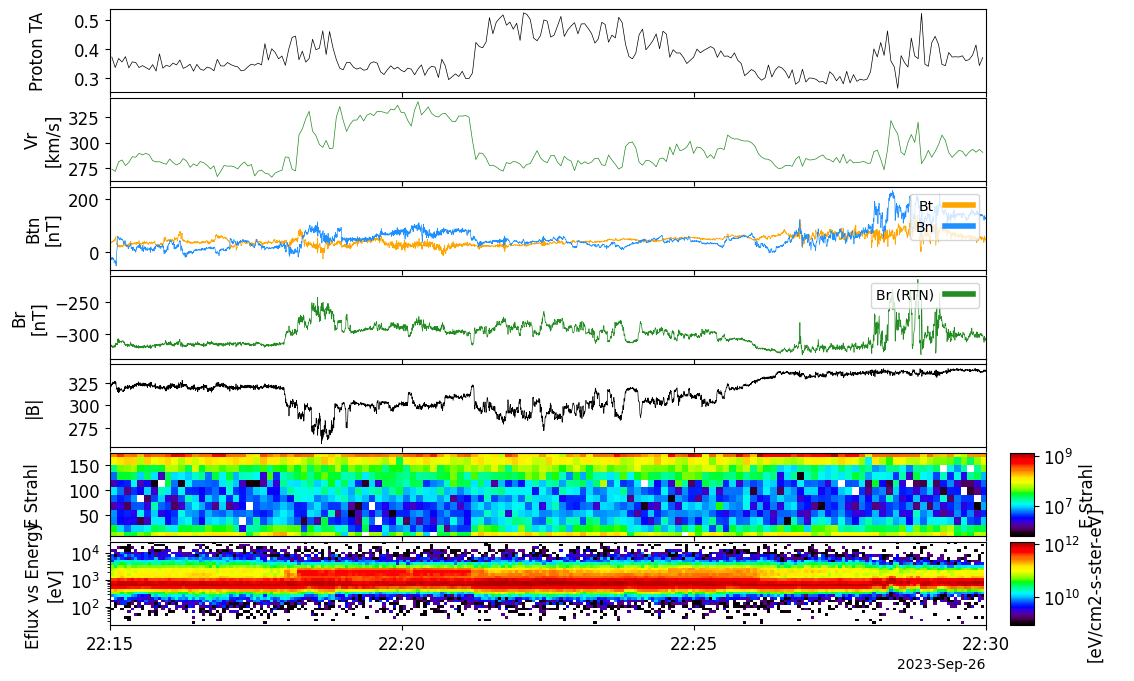

In [66]:
#tplot(['|B|','Br','Btn','E Strahl','proton_EFLUX_VS_ENERGY'])
tplot(['Proton TA','Vr','Btn','Br','|B|', 'E Strahl', 'proton_EFLUX_VS_ENERGY'])

In the middle of the 17th, the electron strahl PADs switched from 0 to 180, Br changed sign, and |B| was depleted. These all indicate a heliospheric current sheet crossing. Let's zoom in.

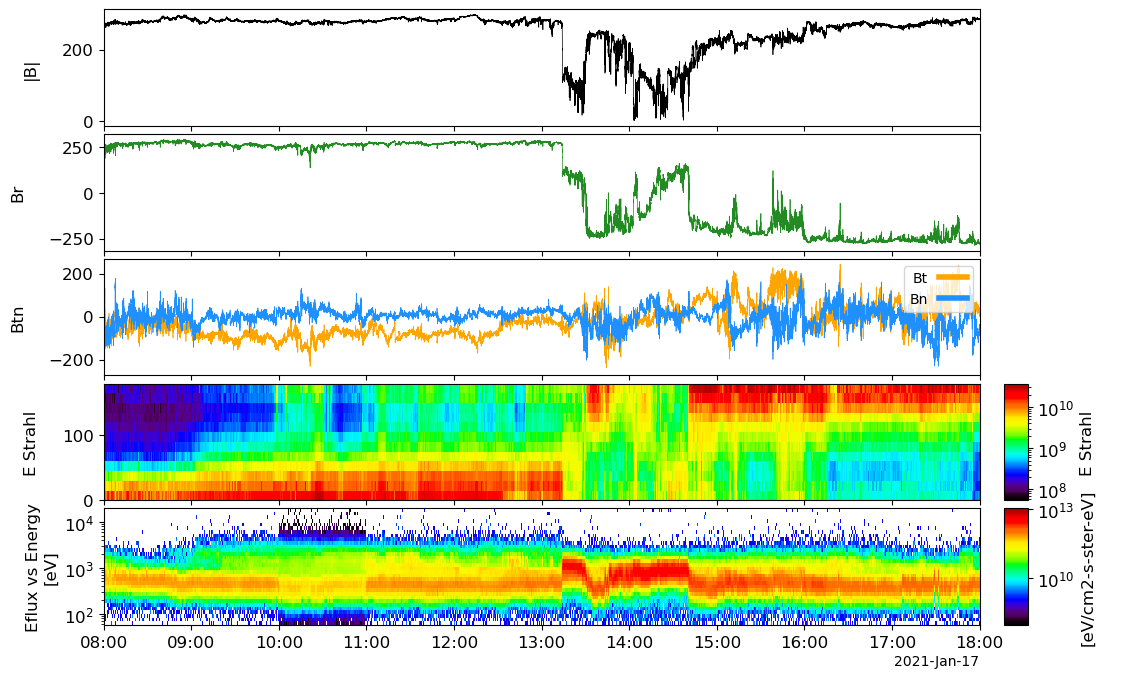

In [32]:
xlim('2021-01-17/08:00','2021-01-17/18:00')
tplot(['|B|','Br','Btn','E Strahl','proton_EFLUX_VS_ENERGY'])

## 4.) Pick your favorite variables and let the exploration begin

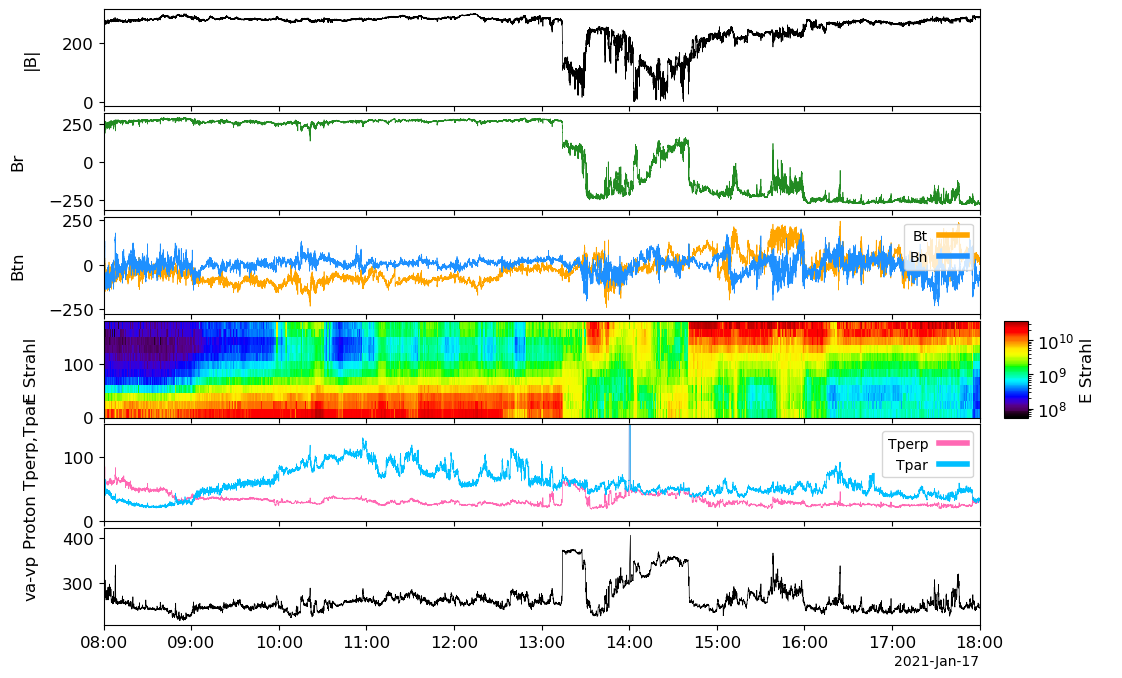

In [33]:
xlim('2021-01-17/08:00','2021-01-17/18:00')
tplot(['|B|','Br','Btn','E Strahl','Proton TperpTpar','va-vp'])

Interesting coincidences between the electrons, protons, alphas, and magnetic field tend to occur associated with HCS crossings. Can you help find them ?

In [51]:
#Begin your own investigation here

## 5.) Plot Proton VDFs

Go here for full tutorial: https://github.com/jlverniero/PSP_Data_Analysis_Tutorials/blob/main/PSP_SPAN-I_VDF_Plot_Tutorial.ipynb

In [34]:
trange = ['2021-01-17/09:00','2021-01-17/14:00']
spi_l2_vars = pyspedas.psp.spi(trange=trange, datatype='spi_sf00_8dx32ex8a', level='l2', time_clip=True, get_support_data= True, varnames=['*'],notplot=True,downloadonly=True)
#open CDF file
dat = cdflib.CDF(spi_l2_vars[0])

#print variable names in CDF files
print(dat._get_varnames())
cdf_VDfile=dat

#check variable formats in cdf file
print(cdf_VDfile)
epoch_ns        = cdf_VDfile['Epoch']
theta           = cdf_VDfile['THETA']
phi             = cdf_VDfile['PHI']
energy          = cdf_VDfile['ENERGY']
eflux           = cdf_VDfile['EFLUX']
rotMat          = cdf_VDfile['ROTMAT_SC_INST']
counts          = cdf_VDfile['DATA']

#convert time
import datetime
datetime_t0 = datetime.datetime(2000, 1, 1, 12, 0, 0)
epoch = cdflib.cdfepoch.to_datetime(cdf_VDfile.varget('Epoch'))

05-Apr-24 22:16:34: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l2/spi_sf00_8dx32ex8a/2021/
05-Apr-24 22:16:34: File is current: psp_data/sweap/spi/l2/spi_sf00_8dx32ex8a/2021/psp_swp_spi_sf00_l2_8dx32ex8a_20210117_v04.cdf


([], ['Epoch', 'TIME', 'MET', 'APID', 'SEQN', 'SEQN_DELTA', 'SEQN_GROUP', 'PKT_SIZE', 'SOURCE_APID', 'SOURCE_HASH', 'COMPR_RATIO', 'NDAT', 'DATASIZE', 'LTCSNNNN_BITS', 'ARCH_BITS', 'MODE2_ORI', 'MODE2', 'F0', 'STATUS_BITS', 'PEAK_BIN', 'PRODUCT_BITS', 'NUM_TOTAL', 'NUM_ACCUM', 'TIME_TOTAL', 'TIME_ACCUM', 'CNTS', 'DATA', 'GAP', 'QUALITY_FLAG', 'EFLUX', 'ENERGY', 'THETA', 'PHI', 'ROTMAT_SC_INST'])


In [35]:
def convert_time(year, month, day, hour, minute,second):
#convert time

    tSlice = datetime.datetime(year, month, day, hour, minute, second)
    print('Desired timeslice start:',tSlice)

    #find span-i index for desired timeslice
    tSliceIndex  = bisect.bisect_left(epoch,tSlice)
    print('time Index start spi:',tSliceIndex)
    print('Time of closest start data point spi:',epoch[tSliceIndex])

    return tSliceIndex

In [36]:
def plot_spani_vdf(year, month, day, hour, minute, second):
    #input time, output theta and phi plane VDF plots
    
    #find index of given time
    tSliceIndex = convert_time(year, month, day, hour , minute, second)
    
    #access data at that index
    epochSlice  = epoch[tSliceIndex]
    thetaSlice  = theta[tSliceIndex,:]
    phiSlice    = phi[tSliceIndex,:]
    energySlice = energy[tSliceIndex,:]
    efluxSlice  = eflux[tSliceIndex,:]
    countsSlice = counts[tSliceIndex,:]
    
    #reshape data to reflect 8 theta bins, 32 energy bins, and 8 phi bins
    thetaReshaped = thetaSlice.reshape((8,32,8))
    phiReshaped = phiSlice.reshape((8,32,8))
    energyReshaped = energySlice.reshape((8,32,8))
    efluxReshaped = efluxSlice.reshape((8,32,8))
    countsReshaped = countsSlice.reshape((8,32,8))

    mass_p = 0.010438870      #proton mass in units eV/c^2 where c = 299792 km/s
    charge_p = 1              #proton charge in units eV

    #Define VDF
    numberFlux = efluxReshaped/energyReshaped
    vdf = numberFlux*(mass_p**2)/((2E-5)*energyReshaped)

    #Convert to velocity units in each energy channel
    vel = np.sqrt(2*charge_p*energyReshaped/mass_p)
    vx = vel * np.cos(np.radians(phiReshaped)) * np.cos(np.radians(thetaReshaped))
    vy = vel * np.sin(np.radians(phiReshaped)) * np.cos(np.radians(thetaReshaped))
    vz = vel *                                   np.sin(np.radians(thetaReshaped))

    #theta is along dimension 0, while phi is along 2
    #first cut through theta
    theta_cut=0 

    phi_plane = phiReshaped[theta_cut,:,:]
    theta_plane = thetaReshaped[theta_cut,:,:]
    energy_plane = energyReshaped[theta_cut,:,:]
    vel_plane = np.sqrt(2*charge_p*energy_plane/mass_p)

    df_theta=np.nansum(vdf,axis=0)

    vx_plane_theta = vel_plane * np.cos(np.radians(phi_plane)) * np.cos(np.radians(theta_plane))
    vy_plane_theta = vel_plane * np.sin(np.radians(phi_plane)) * np.cos(np.radians(theta_plane))
    vz_plane_theta = vel_plane *                                   np.sin(np.radians(theta_plane))

    fig,ax=plt.subplots()
    cs=ax.contourf(vx_plane_theta, vz_plane_theta, df_theta,locator=ticker.LogLocator(),cmap=cm.cool)
    cbar = fig.colorbar(cs)
    cbar.set_label(f'f $(cm^2 \\ s \\ sr \\ eV)^{-1}$')

    ax.set_xlim(-1000,0)
    ax.set_ylim(-500,500)
    ax.set_xlabel('$v_x$ km/s')
    ax.set_ylabel('$v_z$ km/s')
    tname=f"{epoch[tSliceIndex].strftime('%y-%m-%d/%H:%M:%S')}"
    ax.set_title('Protons '+tname,fontsize=12)
    
    
    #now repeat for phi dimension
    phi_cut = 1
    
    phi_plane = phiReshaped[:,:,phi_cut]
    theta_plane = thetaReshaped[:,:,phi_cut]
    energy_plane = energyReshaped[:,:,phi_cut]
    vel_plane = np.sqrt(2*charge_p*energy_plane/mass_p)

    df_phi=np.nansum(vdf,axis=2)

    vx_plane_phi = vel_plane * np.cos(np.radians(phi_plane)) * np.cos(np.radians(theta_plane))
    vy_plane_phi = vel_plane * np.sin(np.radians(phi_plane)) * np.cos(np.radians(theta_plane))
    vz_plane_phi = vel_plane *                                   np.sin(np.radians(theta_plane))

    fig,ax=plt.subplots()
    cs=ax.contourf(np.transpose(vx_plane_phi), np.transpose(vy_plane_phi), np.transpose(df_phi),locator=ticker.LogLocator(),cmap=cm.cool)
    cbar = fig.colorbar(cs)
    cbar.set_label(f'f $(cm^2 \\ s \\ sr \\ eV)^{-1}$')

    ax.set_xlim(-700,0)
    ax.set_ylim(-200,500)
    ax.set_xlabel('$v_x$ km/s')
    ax.set_ylabel('$v_y$ km/s')
    ax.set_title('VDF SPAN-I $\\phi$-plane')

Desired timeslice start: 2021-01-17 11:30:37
time Index start spi: 11855
Time of closest start data point spi: 2021-01-17 11:30:38.476899


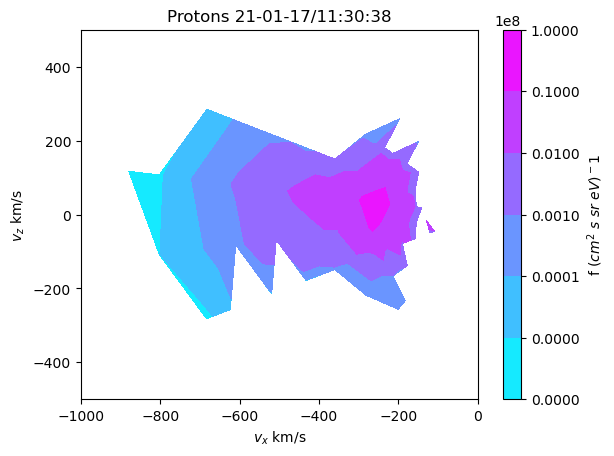

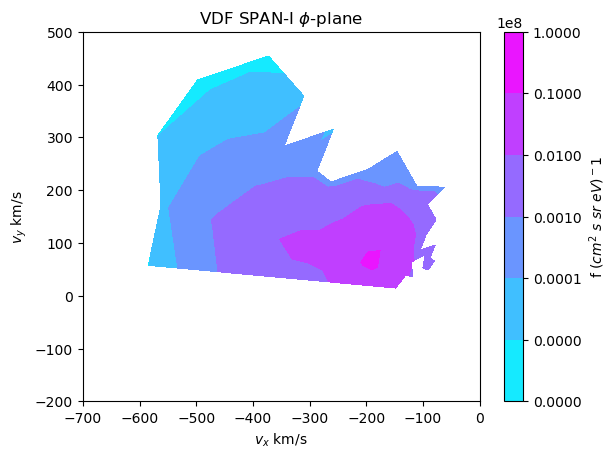

In [37]:
plot_spani_vdf(2021,1,17,11,30,37)

## 5.) Check for sufficent SPAN-I field-of-view (FOV)

Go here for full tutorial: https://github.com/jlverniero/PSP_Data_Analysis_Tutorials/blob/main/PSP_SPAN-I_FOV_diagnostic.ipynb

### 5.1) Phi angle coverage:

The first (and perhaps most dominant) effect on SPAN-I data reliabiliy is how much the plasma is cut off by the heat shield. This is mostly in the phi direction of the instrument. To see this, we plot the energy flux in the three planes of the instrument: Energy, Theta (anode), and Phi (look direction).

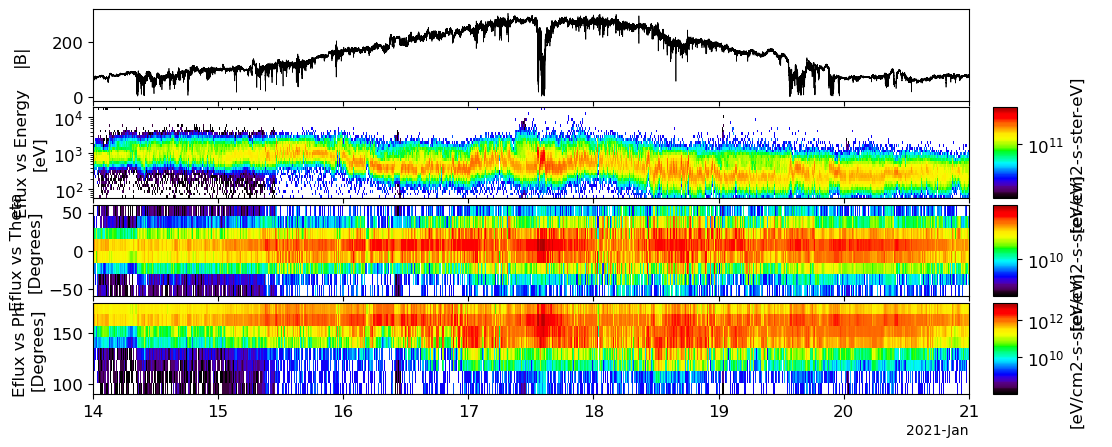

In [38]:
#reset full time range
xlim('2021-01-14','2021-01-21')
tplot(['|B|','proton_EFLUX_VS_ENERGY','proton_EFLUX_VS_THETA','proton_EFLUX_VS_PHI'])

In the fourth panel, we see how much energy flux is captured in each $\phi$ angle bin. To determine "good" coverage by eye, one should observe that there exists a peak in the range of angles, meaning the peak (or core) of the distribution is covered in the phi measurement plane. We also want to make sure this peak is located at the 160 degree mark or lower. Note that the 180 bin will always appear to have lower flux, which may be a deceptive peak.


Anytime, the collapsed VDFs (E, theta, phi), approach the edges of the coverage, we have partial loss of VDF information. Theta and Energy coverage are also an important factor to consider, especially in later encounters.

We may define a rudimentary FOV diagnostic based on the location of the maximum flux in the phi-plane.

In [39]:
#define variables
eflux_phi_data=get_data('proton_EFLUX_VS_PHI')
times_unix=eflux_phi_data.times
eflux = eflux_phi_data.y
phi = eflux_phi_data.v

#determine phi angle with max eflux
max_phi_ind = np.argmax(eflux, axis=1)
max_phi = phi[0, max_phi_ind]

#determine average phi
avg_phi = np.average(eflux,axis=1)

#define fov array
tlen = times_unix.shape[0]
phi_fov=np.ones(tlen)

#set threshold 163.125 degrees
phi_thresh = phi[0,1]

#set fov to 0, meaning reliable, if less than 163.125
for x in range(0,tlen):
    if max_phi[x] < phi_thresh:
        phi_fov[x]=0


Now we have array of zeros and ones indicating if the phi coverage is sufficient. We can mark the times with red xs below, where 1 means sufficient, and 0 means insufficient.

In reality, this determination is not quantized or binary. This is a 0th order, HIGHLY rudimentary diagnostic.

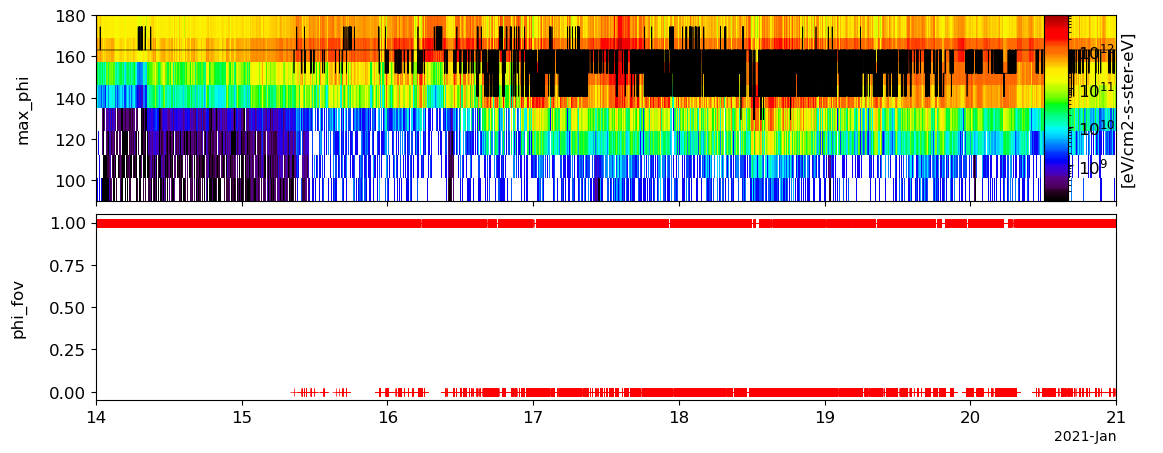

In [40]:
store_data('max_phi',data={'x':times_unix,'y':max_phi})
options('max_phi','color','k')

store_data('phi_fov',data={'x':times_unix,'y':phi_fov})
options('phi_fov','color','r')
options('phi_fov','symbols',True)
options('phi_fov','marker','+')

store_data('EFLUX_VS_PHI_max',data=["proton_EFLUX_VS_PHI","max_phi"])

tplot(['EFLUX_VS_PHI_max','phi_fov'])

(Note I am not sure why the colorbar is offset after overplotting, this is most likely a pyspedas bug.)

We can see that the inbound mostly does not have sufficent coverage by the SPAN-I instrument. During these times, over half the VDF is not captured and therefore the plasma measurements are unreliable during these times. In principle, one could then look to SPC during these times, if available. The sweap instrument team is currently working on a joint SPC-SPAN data product and calibration efforts are ongoing.

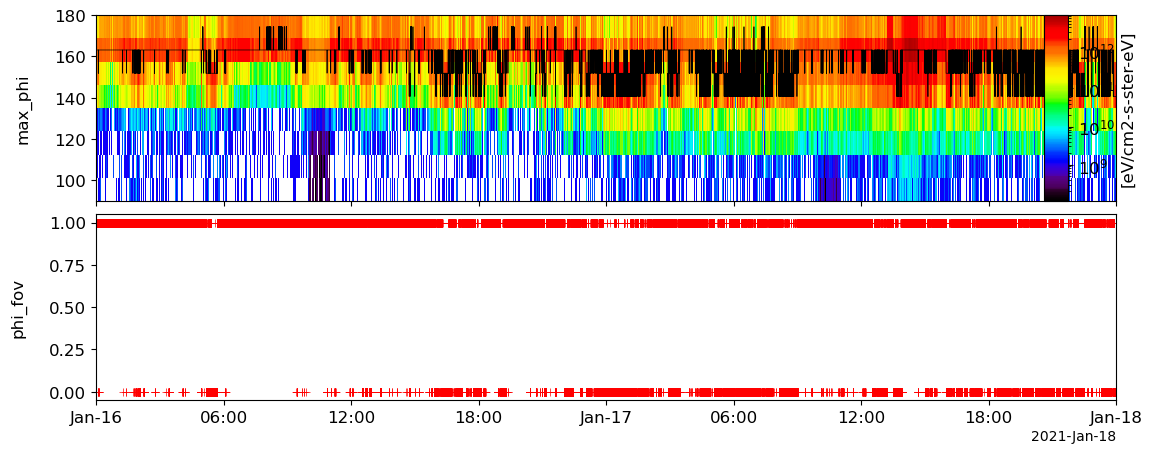

In [41]:
xlim('2021-01-16','2021-01-18')
tplot(['EFLUX_VS_PHI_max','phi_fov'])

We can see that the measurements start to slighly be reliable on the 16th and more on the 17th. 

In general, SPAN-I has better reliability +/- a few days from perihelion.

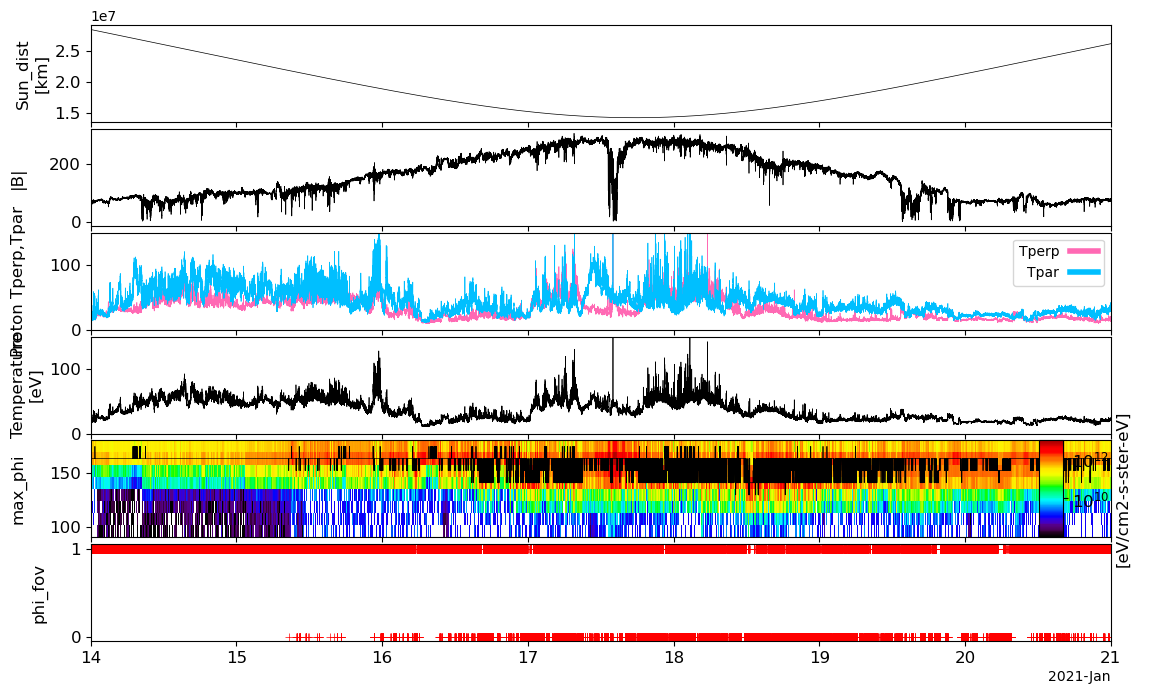

In [42]:
xlim('2021-01-14','2021-01-21')
options('proton_TEMP','yrange',[0,150])
tplot(['proton_SUN_DIST','|B|','Proton TperpTpar','proton_TEMP','EFLUX_VS_PHI_max','phi_fov'])

## 5.2) QTN Comparison


The Quasithermal Noise (QTN) data from the FIELDS instrument is presently the most reliable measurement of density. See Moncuquet et al. (DOI: 10.3847/1538-4365/ab5a84) for more details.

 Since SPAN-I measures partial moments of the VDF, density is highly sensitive to inaccuracies. In addition to the $\phi$ angular coverage assessment described above, the data user is encouraged to compare the SPAN-I measured density to the density derived from QTN. Note that this measurement is also prone to error, and there is currently no agreed upon value of density. Ongoing calibration efforts by the instrument team continue to converge closer to an answer. Below, we show how to compare the QTN and SPAN-I measured density.

Note there is not a defined threshold for offsets, as the answer depends on the physical problem at hand. The user is encouraged to reach out to the SPAN-I instrument team for recommendations if the SPAN-I density in the time period of interest deviates strongly from the QTN.

Future additions to this tutorial will show how to also compare with density measured by SPC.

In [ ]:
#note we already downloaded this above, but in case you want to skip here to check FOV first, one can redownload.
qtn_datatype = 'sqtn_rfs_V1V2' #sqtn
qtn_vars = pyspedas.psp.fields(trange=trange, datatype=qtn_datatype, level='l3', time_clip=True,get_support_data=True)

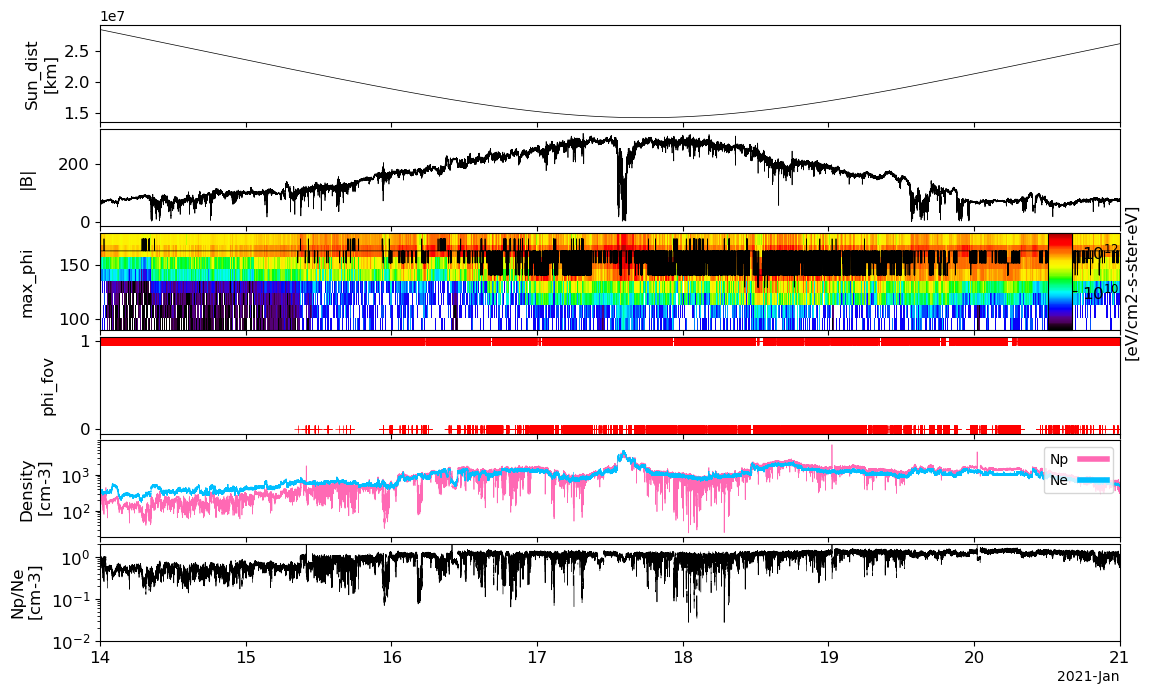

In [43]:
store_data("DENS_compare",data=['proton_DENS','electron_density'])
options('DENS_compare','legend_names',['Np','Ne'])
options('DENS_compare','color',['hotpink','deepskyblue'])

divide('proton_DENS','electron_density','Np/Ne')
options('Np/Ne','ytitle','Np/Ne')
options('Np/Ne','yrange',[1e-2,2])

tplot(['proton_SUN_DIST','|B|','EFLUX_VS_PHI_max','phi_fov','DENS_compare','Np/Ne'])

We may observe that devations of SPAN-I measured proton density (Np) and QTN measured electron density (Ne) are most apparent on the inbound. This is the reason why the alpha-proton number density differed from the alpha-electron number density. Depending on context, the reliability of the alpha measurments may be highly contingent on reliability of proton measurements, especially for temperature.

In addition, deviations from QTN do not always coincide with insufficient phi angle coverage (and vice versa). These two diagnostics should be used independantly to assess measurement reliability. However, if your region of interest has both insufficient phi coverage and also strong deviations from QTN, then one needs to excercise extreme caution and spell out all caveats if one uses the SPAN-I measurements during these times. Other considerations to consider, such as magnetic field variability, may be found in the FOV tutorial: https://github.com/jlverniero/PSP_Data_Analysis_Tutorials/blob/main/PSP_SPAN-I_FOV_diagnostic.ipynb

In summary, days far from perihelion most likely do not have reliable proton measurements from SPAN-I. This does not mean that SPAN-I should not be used at all, only that extra caution should be made and one should spell out all caveats before making a scientific claim. For answering physics problems that only require proton measurements on a larger scale, unreliable span measurment times may be cautiously used (as a ballpark lower bound for example). But, for kinetic physics problems that are highly sensitive to measurement uncertainties, it is not recommended to use SPAN-I during unreliable measurement times. 

Note that the reliability of the alpha particle measurements may also be assessed by the same procedure above. As a general rule of thumb, if the protons are unreliable, then so are the alphas (but not always). In addition, the alphas should only in general be trusted if the alpha/proton number density is above 1 percent. Future work will further characterize the alpha reliability.

For optimal scientific interpretation of noteworthy event, the reader is strongly encouraged to contact a member of the instrument team:<br>
Roberto Livi rlivi@berkeley.edu <br>
Ali Rahmati rahmati@berkeley.edu <br>
Davin Larson davin@berkeley.edu <br>

Thank you, and happy exploring :)